# Project Setup and Math Testing

https://en.wikipedia.org/wiki/Orbit_modeling#Keplerian_orbit_model

https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation

## Math

$$F=G\frac{m_1m_2}{r^2}$$
$$m\ddot{r} = G\frac{m_1m_2}{r^2}$$

### n-body $F=ma$

$$F_{ij}=\frac{Gm_im_j(q_j-q_i)}{||q_j-q_i||^3}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
G = 6.67408E-11
mE = 5.972E24
mS = 1.989E30
mM = 7.347E22

posSun = np.array([0,0,0])
posEarth = np.array([149.6E9,0,0])
posMoon = np.array([149.6E9,384.4E6,0])

F = G*mE*mS*(posEarth-posSun)*(1/(eucDist(posSun,posEarth))**3)
F2 = G*mS*mE*(posSun-posEarth)*(1/(eucDist(posEarth,posSun))**3)

print(F,F2)

[3.54227932e+22 0.00000000e+00 0.00000000e+00] [-3.54227932e+22  0.00000000e+00  0.00000000e+00]


In [4]:
def eucDist(origin, vectorizedGrid):
    '''
    Calculate the euclidian distance between a point (origin) and another point(s)
    
    origin: origin points np.array of shape(n,1)
        n: spacial dimensions of the model
    vectorizedGrid: vectorized grid np.array of shape(n,m^n) ????
        m: grid resolution ????
        
    return an array containing the distance to each point on the grid from the origin
    '''
    dist = np.sqrt(np.sum((origin-vectorizedGrid)**2, axis=0))
    return(dist)

def fofGrav()

def vectorizeGrid(grid): #Used for np.mgrid or a combined np.meshgrid
    '''
    Vectorize and decompose the components of the grid
    
    grid: shape(n,m...m_n)
        n: spacial dimensions of the model
        m: grid resolution
        
    return an array containing the vectorized components of grid shape(n,m^n) ????
    '''
    dimension = grid.shape[0] #Get n
    resolution = np.prod(grid.shape[1:]) #Get resolution by taking the product of the m values 
    
    vectorizedGrid = np.reshape(grid[:],(dimension,resolution)) #Get first vectorized component

    return(vectorizedGrid)

## Grid Creation

### np.meshgrid method 

- Can specify number of grid points
- Slightly extra memory usage

In [14]:
h = np.linspace(-2,2,5) #Grid spacing
x, y, z = np.meshgrid(h,h,h)
test = np.array([y,x,z])

vectorizeGrid(test)

array([[-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
        -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [-2., -2., -2., -2., -2., -1., -1., -1., -1., -1.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2., -2.,
        -2., -2., -2., -2., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2., -2., -2.,
  

### np.mgrid method 

- Can specify spacing between grid points
- Slightly more memory efficent

In [15]:
pointSep = 1 #Seperation between grid points
test = np.mgrid[-2:3:pointSep,-2:3:pointSep,-2:3:pointSep]

vectorizeGrid(test)

array([[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
        -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [-2, -2, -2, -2, -2, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2, -2, -2, -2, -2, -2, -1, -1,
        -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1,  0,  0,  0,  0,
         0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2, -2, -2, -2, -2, -2,
        -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,
   

### Grid visualization for testing

Text(0.5, 0, 'z')

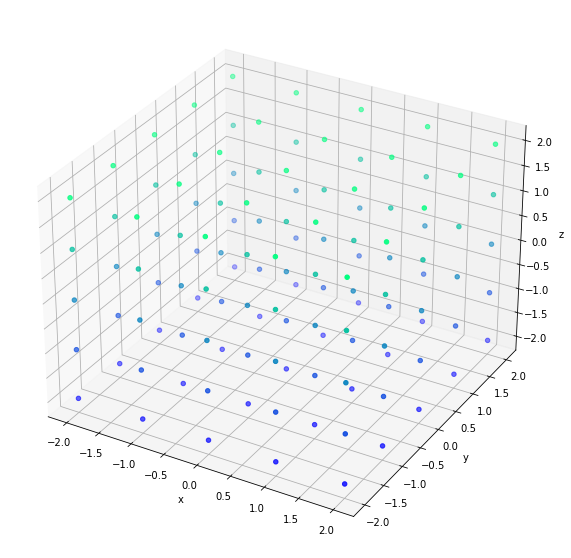

In [16]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(test[1],test[2],test[0], c = test[0], cmap = 'winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Radius Calculation

In [20]:
h = np.linspace(-2,2,5) #Grid spacing
x, y, z = np.meshgrid(h,h,h)
test = np.array([y,x,z])

vecTest = vectorizeGrid(test)

print(vecTest.shape)

display(eucDist(np.array([[1],[1],[1]]),vecTest))
# print(np.array([[1],[1],[1]]).shape)

(3, 125)


array([ 4.32674871,  3.95789161,  3.80295246,  3.77976315,  3.75628575,
        3.95789161,  3.50339806,  3.30192725,  3.27106631,  3.2396118 ,
        3.80295246,  3.30192725,  3.07231683,  3.03658897,  3.        ,
        3.77976315,  3.27106631,  3.03658897,  3.        ,  2.96249607,
        3.75628575,  3.2396118 ,  3.        ,  2.96249607,  2.92401774,
        3.95789161,  3.50339806,  3.30192725,  3.27106631,  3.2396118 ,
        3.50339806,  2.88449914,  2.57128159,  2.5198421 ,  2.46621207,
        3.30192725,  2.57128159,  2.15443469,  2.08008382,  2.        ,
        3.27106631,  2.5198421 ,  2.08008382,  2.        ,  1.91293118,
        3.2396118 ,  2.46621207,  2.        ,  1.91293118,  1.81712059,
        3.80295246,  3.30192725,  3.07231683,  3.03658897,  3.        ,
        3.30192725,  2.57128159,  2.15443469,  2.08008382,  2.        ,
        3.07231683,  2.15443469,  1.44224957,  1.25992105,  1.        ,
        3.03658897,  2.08008382,  1.25992105,  1.        ,  0.  

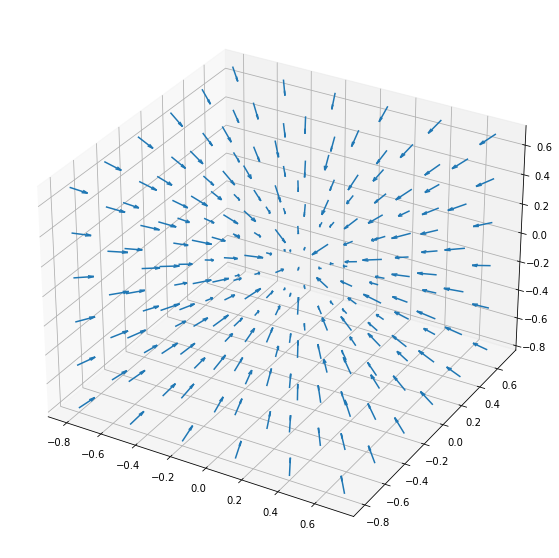

In [33]:
G = 6.67430E-11

def gR(grid):
    return (-2*y, x)
 
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.3),
                      np.arange(-0.8, 1, 0.3),
                      np.arange(-0.8, 1, 0.3))
U = x*-0.1
V = y*-0.1
W = z*-0.1

ax = plt.figure(figsize = (10,10)).add_subplot(projection='3d')
ax.quiver(x,y,z,U,V,W, length = 0.1, normalize = True)

Text(0.5, 0, 'z')

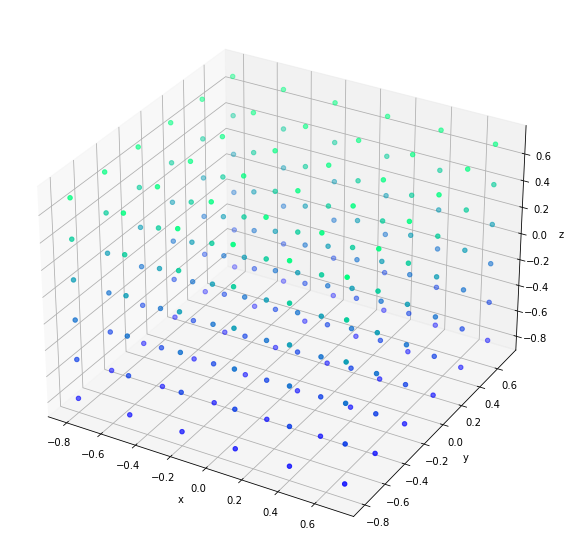

In [35]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z, c = z, cmap = 'winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')